# Contour-based filtering

In [1]:
import matlab.engine
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface
from benchmark_demo.Benchmark import Benchmark
from methods.method_contour_filtering import NewMethod
import sys
import os

In [2]:
# A test for new methods
# np.random.seed(0) 

# signal parameters
SNRin = 30
N = 2**10
Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = 0
tmax = N
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_linear_2()
# s = sbank.signal_mc_cos_plus_tone()
# s = sbank.signal_mc_modulated_tones()
s = sbank.signal_mc_synthetic_mixture()
s = sbank.signal_mc_synthetic_mixture_2()

noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)
# signal, noise = add_snr(s,SNRin)
# signal = s + noise*np.sqrt(N/Nsub)

print(s.total_comps)
print(signal.total_comps)

4
4


C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-denoising\src\benchmark_demo\SignalBank.py:1128: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))


In [3]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F, stft_padded, Npad = get_spectrogram(s, window = g)

methodml = NewMethod()
funa = methodml.method
# signal_r = contour_filtering(s, NumC, Ks, a, Nfft)
# signal_output = funa(signal,[],30,[],2*N)
signal_output = funa(signal,)

S_output, F_output, _, _ = get_spectrogram(signal_output, window = g)

print(Benchmark.snr_comparison(s,signal_output))
# print(20*np.log10((np.linalg.norm(s[tmin:tmax]))/(np.linalg.norm((s[tmin:tmax]-signal_output[tmin:tmax])))))

33.93183306937547


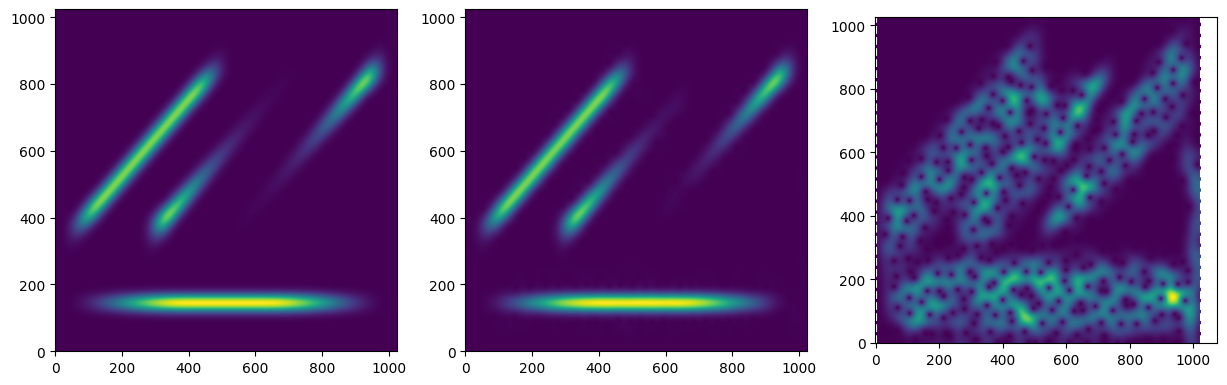

In [4]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].plot([tmin, tmin], [0, Nfft//2],'w--')
ax[2].plot([tmax, tmax], [0, Nfft//2],'w--')
plt.show()
